<a href="https://colab.research.google.com/github/Sabyh11/Coursera_Capstone/blob/master/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
##1. Load Data and Splot Data
#from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
# It can take 1 minute so be patient
import h5py


I think there are only 2 dense layers of 10 and 1 units. Try changing it to 3, with 128,256,512 and then 1 unit for output.



In [13]:
import h5py
f = h5py.File('/content/drive/My Drive/ImageData/CatvsDog200_1903.h5','r')

list(f.keys())

['X_test', 'X_train', 'Y_test', 'Y_train']

In [14]:
import h5py
with h5py.File('/content/drive/My Drive/ImageData/CatvsDog200_1903.h5','r') as PSL_handle:
    X_train = PSL_handle["X_train"][:]
    X_test = PSL_handle["X_test"][:]
    Y_train = PSL_handle["Y_train"][:]
    Y_test = PSL_handle["Y_test"][:]
print("Shape of Data \n Training Data:{} Training Labels:{} \n Testing Data:{}\
Tesing Labels: {}".format(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape))

Shape of Data 
 Training Data:(231, 100, 100, 3) Training Labels:(231,) 
 Testing Data:(100, 100, 100, 3)Tesing Labels: (100,)


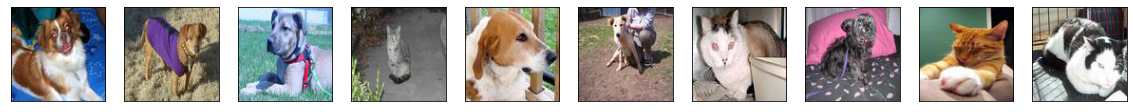

In [15]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()


**bold text**# New Section

In [13]:
X_train.shape

(231, 100, 100, 3)

In [5]:
print("Previous X_train shape: {}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(X_train.shape[0], -1) 
print("Previous X_train shape: {}".format(X_train.shape))
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')
print(X_train[0])

Previous X_train shape: (231, 100, 100, 3)
Previous X_train shape: (231, 30000)
[0.36078432 0.3137255  0.32156864 ... 0.76862746 0.7411765  0.6784314 ]


In [16]:
from keras.optimizers import SGD
input_size = 30000
batch_size = 8   
hidden = 5
epochs = 20

In [6]:
X_train[0].shape

(100, 100, 3)

In [7]:
X_train.shape
Y_train.shape

(231,)

In [23]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout
import tensorflow

model=tensorflow.keras.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(tensorflow.keras.layers.Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(tensorflow.keras.layers.Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(tensorflow.keras.layers.Activation("relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))
model.add(Dense(1))
model.add(tensorflow.keras.layers.Activation("sigmoid"))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 47, 47, 64)       

In [24]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 5s 652ms/step - loss: 7.3849 - accuracy: 0.5411 - val_loss: 0.6890 - val_accuracy: 0.5417
Epoch 2/100
7/7 [==============================] - 4s 623ms/step - loss: 1.7178 - accuracy: 0.6763 - val_loss: 0.7233 - val_accuracy: 0.4583
Epoch 3/100
7/7 [==============================] - 4s 624ms/step - loss: 1.3417 - accuracy: 0.7101 - val_loss: 1.9835 - val_accuracy: 0.3750
Epoch 4/100
7/7 [==============================] - 4s 621ms/step - loss: 0.7831 - accuracy: 0.7826 - val_loss: 4.1943 - val_accuracy: 0.3750
Epoch 5/100
7/7 [==============================] - 4s 619ms/step - loss: 0.6786 - accuracy: 0.7874 - val_loss: 7.4378 - val_accuracy: 0.3750
Epoch 6/100
7/7 [==============================] - 4s 620ms/step - loss: 0.4890 - accuracy: 0.8599 - val_loss: 11.2969 - val_accuracy: 0.3750
Epoch 7/100
7/7 [==============================] - 4s 622ms/step - loss: 0.4714 - accuracy: 0.8116 - val_loss: 14.4780 - val_accuracy: 0.3750
Epoch 8/100

In [ ]:
sgd = SGD(lr=0.001)
model = Sequential()     
model.add(Dense(10, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
#model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
# Compilation
model.compile(loss='binary_crossentropy', 
    metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                300010    
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 4         
Total params: 300,047
Trainable params: 300,047
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 96ms/step - loss: 4.7037 - accuracy: 0.6300

Test accuracy: 62.99999952316284
[1 0 1 1 1 1 0 1 1 0]


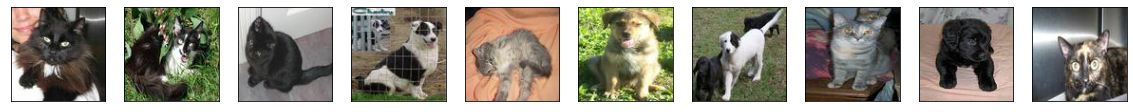

In [26]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
import numpy as np
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]*100)
mask = range(20,30)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(np.squeeze(y_pred))
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
from time import time
tic = time()
model.fit(X_train, Y_train, batch_size=16, epochs=2000, verbose=1, validation_split=0.2)
toc = time()
print("Training took {} milisec :".format ((toc-tic)*100))


Train on 184 samples, validate on 47 samples
Epoch 1/2000
184/184 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5978 - val_loss: 0.6829 - val_accuracy: 0.5106
Epoch 2/2000
184/184 [==============================] - 0s 340us/step - loss: 0.6795 - accuracy: 0.5978 - val_loss: 0.6829 - val_accuracy: 0.5106
Epoch 3/2000
184/184 [==============================] - 0s 326us/step - loss: 0.6755 - accuracy: 0.6141 - val_loss: 0.6912 - val_accuracy: 0.4894
Epoch 4/2000
184/184 [==============================] - 0s 318us/step - loss: 0.6637 - accuracy: 0.6087 - val_loss: 0.6828 - val_accuracy: 0.5106
Epoch 5/2000
184/184 [==============================] - 0s 319us/step - loss: 0.6722 - accuracy: 0.6250 - val_loss: 0.6840 - val_accuracy: 0.4681
Epoch 6/2000
184/184 [==============================] - 0s 317us/step - loss: 0.6537 - accuracy: 0.6467 - val_loss: 0.6827 - val_accuracy: 0.4894
Epoch 7/2000
184/184 [==============================] - 0s 321us/step - loss: 0.6

100/100 [==============================] - 0s 343us/step
Test Accuracy: 0.5199999809265137
100/100 [==============================] - 0s 141us/step

Test accuracy: 51.99999809265137
[1 0 1 1 1 0 1 1 1 1]


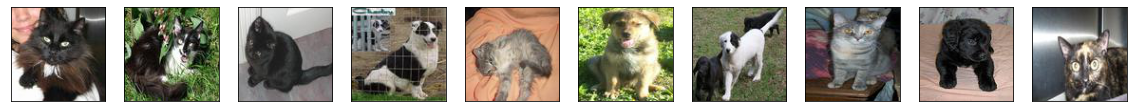

In [ ]:
score = model.evaluate(X_test,Y_test)
print("Test Accuracy: {}".format(score[1]))

import numpy as np
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]*100)
mask = range(20,30)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(np.squeeze(y_pred))
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()